In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\users\rendo\08-2020 Instacart Basket Analysis'

In [3]:
instacart_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','instacart_all.pkl'))

In [4]:
instacart_all.shape

(30629741, 37)

In [6]:
instacart_all

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,family_status_flag,department,goods_group,goods_sales_count
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages,Grocery Essentials,Medium Sales
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages,Grocery Essentials,Medium Sales
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low spender,19.0,Regular customer,Midwest,active_customer,Middle Age,Family,beverages,Grocery Essentials,Medium Sales
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Low spender,26.0,Non-frequent customer,West,active_customer,Under 40,Single adult,beverages,Grocery Essentials,Medium Sales
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Low spender,26.0,Non-frequent customer,West,active_customer,Under 40,Single adult,beverages,Grocery Essentials,Medium Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629736,177599,Donna,Ruiz,Female,Kansas,71,4/1/2020,3,married,119306,...,Low spender,5.0,Frequent customer,Midwest,non_active_customer,Seniors,Family,other,Non-Grocery Items,Low Sales
30629737,122741,Carl,Weber,Male,Michigan,24,4/1/2020,2,married,73357,...,Low spender,30.0,Non-frequent customer,Midwest,active_customer,Under 40,Family,other,Non-Grocery Items,Low Sales
30629738,122741,Carl,Weber,Male,Michigan,24,4/1/2020,2,married,73357,...,Low spender,30.0,Non-frequent customer,Midwest,active_customer,Under 40,Family,other,Non-Grocery Items,Low Sales
30629739,122741,Carl,Weber,Male,Michigan,24,4/1/2020,2,married,73357,...,Low spender,30.0,Non-frequent customer,Midwest,active_customer,Under 40,Family,other,Non-Grocery Items,Low Sales


In [7]:
instacart_all['goods_sales_count'].value_counts (dropna = False)

goods_sales_count
Medium Sales    15939573
High Sales      14064681
Low Sales         625487
Name: count, dtype: int64

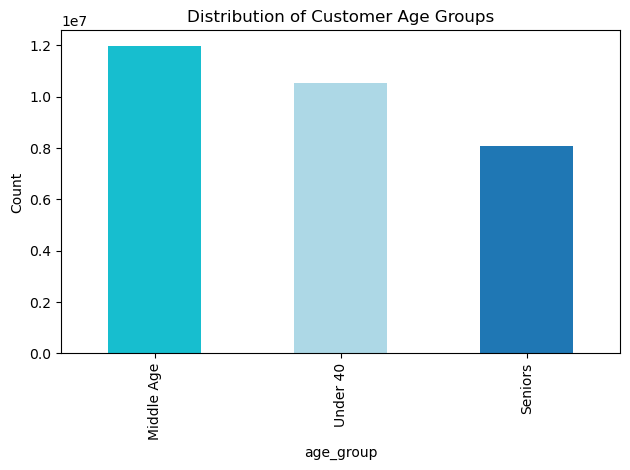

In [8]:
# Create a bar chart of the 'age_group'
bar_age_group_distribution = instacart_all['age_group'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Customer Age Groups",fontsize=12)
plt.tight_layout()  

### middle age is the highest consumers while seniors are the lowest.

In [9]:
# Export chart
bar_age_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

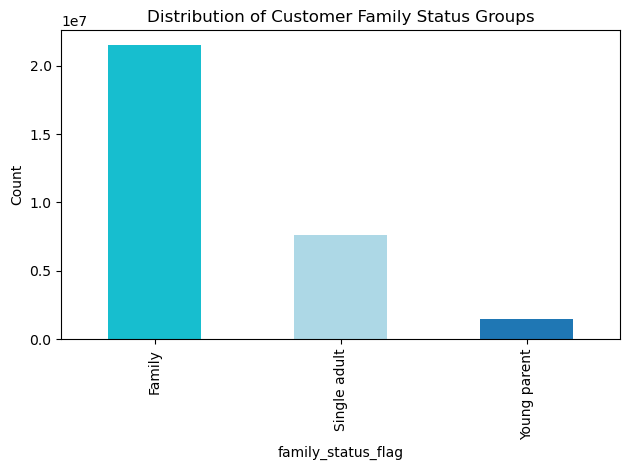

In [13]:
# Create a bar chart of the 'family_status_flag'
bar_family_status_group_distribution = instacart_all['family_status_flag'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Customer Family Status Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters

### instacart orders are mostly placed by families. Young parents are the least to use instacart.

In [14]:
# Export chart
bar_family_status_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_group.png'))

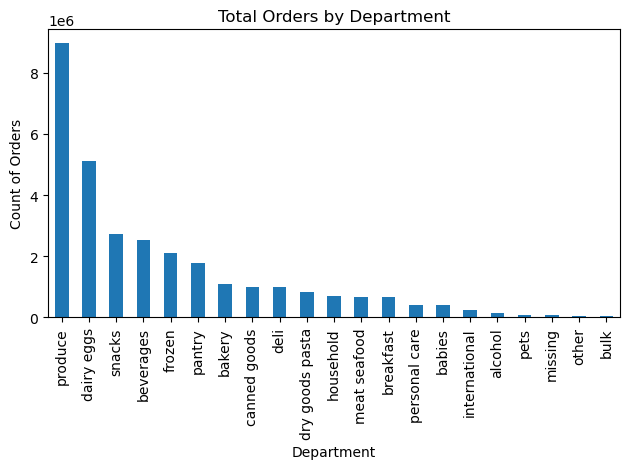

In [15]:
# Create bar chart for department orders

department_bar = instacart_all['department'].value_counts().plot.bar(color='tab:blue')
plt.title('Total Orders by Department')
plt.tight_layout()
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.tight_layout()  # Automatically adjust subplot parameters

### produce, dairy eggs, snacks, beverages, and frozen are the top 5 departments while produce and dairy eggs are significantly higher.

In [17]:
# Export
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_department_bar.png'))

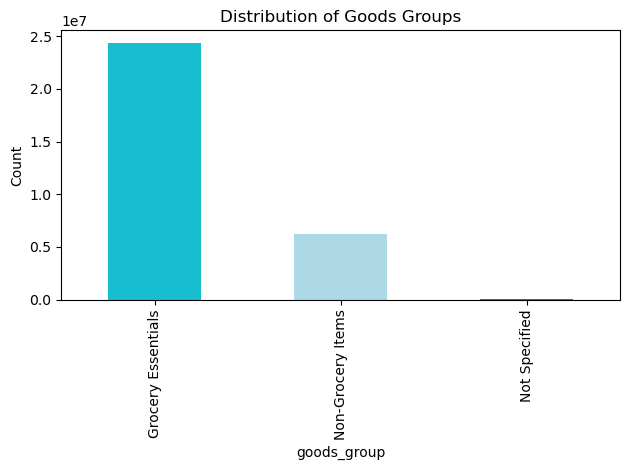

In [18]:
goods_group_distribution = instacart_all['goods_group'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Goods Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters

### grocery essentials are ordereed through instacart.

In [19]:
# Export 
goods_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_group_bar.png'))

In [21]:
age_group_agg = instacart_all.groupby('age_group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [22]:
age_group_agg

days_since_prior_order                  prices                
                              min   max       mean    min   max      mean
age_group                                                                
Middle Age                    0.0  30.0  11.124224    1.0  25.0  7.792033
Seniors                       0.0  30.0  11.080959    1.0  25.0  7.797149
Under 40                      0.0  30.0  11.117655    1.0  25.0  7.787678

In [24]:
crosstab_age_freq=pd.crosstab(instacart_all['order_frequency_flag'],instacart_all['age_group'],dropna=False)

In [25]:
crosstab_age_freq

age_group,Middle Age,Seniors,Under 40
order_frequency_flag,,,
Frequent customer,7958362,5406250,6998094
Non-frequent customer,1364767,895656,1182527
Regular customer,2663376,1795665,2365039


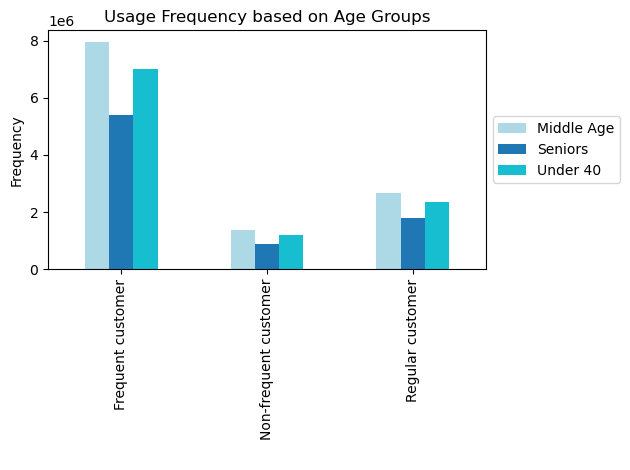

In [26]:
bar_crosstab_age_freq=crosstab_age_freq.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Usage Frequency based on Age Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

In [27]:
bar_crosstab_age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_freq.png'))

In [28]:
crosstab_age_expenditure=pd.crosstab(instacart_all['spending_flag'],instacart_all['age_group'],dropna=False)

In [29]:
crosstab_age_expenditure

age_group,Middle Age,Seniors,Under 40
spending_flag,,,
High spender,46714,30642,36745
Low spender,11939796,8066929,10508915


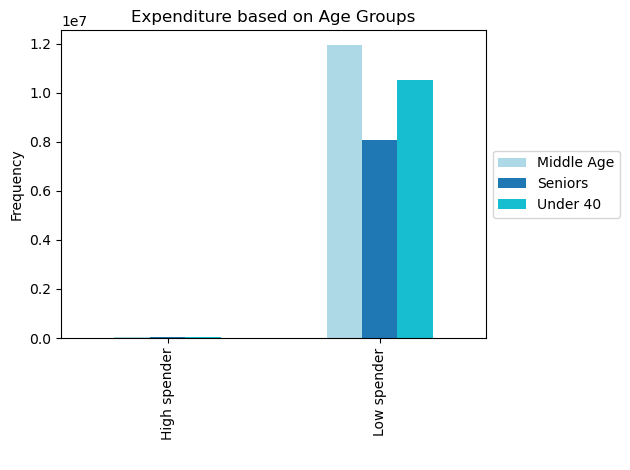

In [30]:
bar_crosstab_age_expend=crosstab_age_expenditure.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Expenditure based on Age Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout() 

In [31]:
# export
bar_crosstab_age_expend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_expenditure.png'))

In [32]:
# Filter out rows with 'Not Specified' in the 'goods_group' column
filtered_data = instacart_all[instacart_all['goods_group'] != 'Not Specified']

In [33]:
filtered_data['goods_group']

0           Grocery Essentials
1           Grocery Essentials
2           Grocery Essentials
3           Grocery Essentials
4           Grocery Essentials
                   ...        
30629736     Non-Grocery Items
30629737     Non-Grocery Items
30629738     Non-Grocery Items
30629739     Non-Grocery Items
30629740     Non-Grocery Items
Name: goods_group, Length: 30531718, dtype: object

In [34]:
crosstab_age_products = pd.crosstab(filtered_data['goods_group'], filtered_data['age_group'], dropna=False)

In [35]:
crosstab_age_products

age_group,Middle Age,Seniors,Under 40
goods_group,,,
Grocery Essentials,9516070,6437834,8374188
Non-Grocery Items,2432271,1633921,2137434


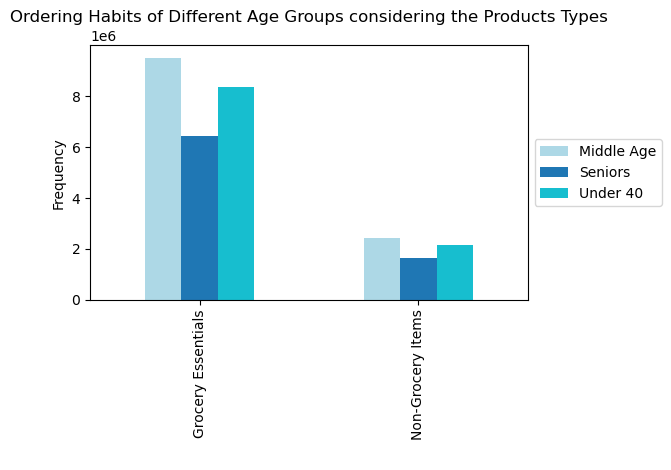

In [36]:
bar_crosstab_age_products=crosstab_age_products.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Ordering Habits of Different Age Groups considering the Products Types", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [37]:
# export
bar_crosstab_age_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_types_products.png'))

In [41]:
family_status_group_agg = instacart_all.groupby('family_status_flag',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [42]:
family_status_group_agg

days_since_prior_order                  prices        \
                                      min   max       mean    min   max   
family_status_flag                                                        
Family                                0.0  30.0  11.123960    1.0  25.0   
Single adult                          0.0  30.0  11.084925    1.0  25.0   
Young parent                          0.0  30.0  11.047268    1.0  25.0   

                              
                        mean  
family_status_flag            
Family              7.791707  
Single adult        7.789536  
Young parent        7.806728

In [44]:
crosstab_family_status_freq=pd.crosstab(instacart_all['order_frequency_flag'],instacart_all['family_status_flag'],dropna=False)

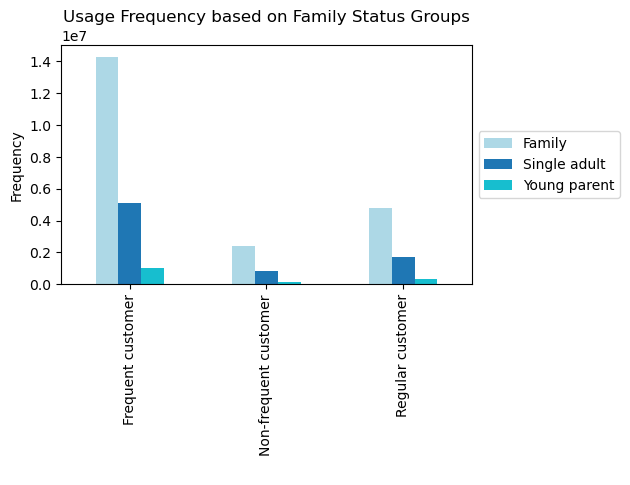

In [45]:
bar_crosstab_family_status_freq=crosstab_family_status_freq.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Usage Frequency based on Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [46]:
# Export
bar_crosstab_family_status_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_freq.png'))

In [47]:
crosstab_family_status_expenditure=pd.crosstab(instacart_all['spending_flag'],instacart_all['family_status_flag'],dropna=False)

In [48]:
crosstab_family_status_expenditure

family_status_flag,Family,Single adult,Young parent
spending_flag,,,
High spender,77470,31190,5441
Low spender,21431741,7618508,1465391


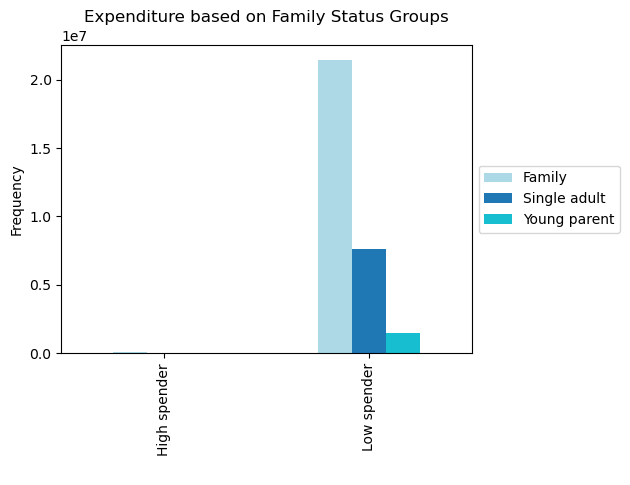

In [49]:
bar_crosstab_family_status_expend=crosstab_family_status_expenditure.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Expenditure based on Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [50]:
bar_crosstab_family_status_expend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_expenditure.png'))

In [51]:
crosstab_family_status_products = pd.crosstab(filtered_data['goods_group'], filtered_data['family_status_flag'], dropna=False)

In [52]:
crosstab_family_status_products

family_status_flag,Family,Single adult,Young parent
goods_group,,,
Grocery Essentials,17080936,6083141,1164015
Non-Grocery Items,4359078,1542605,301943


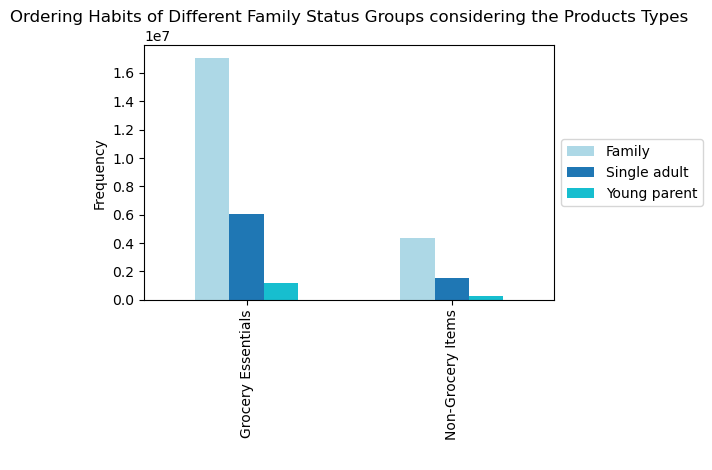

In [53]:
bar_crosstab_family_status_products=crosstab_family_status_products.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Ordering Habits of Different Family Status Groups considering the Products Types", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [54]:
# Export
bar_crosstab_family_status_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_types_products.png'))

In [55]:
crosstab_age_region=pd.crosstab(instacart_all['region'],instacart_all['age_group'],dropna=False)

In [56]:
crosstab_age_region

age_group,Middle Age,Seniors,Under 40
region,,,
Midwest,2853984,1875272,2447668
Northeast,2089586,1478732,1853707
South,3952097,2677830,3569055
West,3090843,2065737,2675230


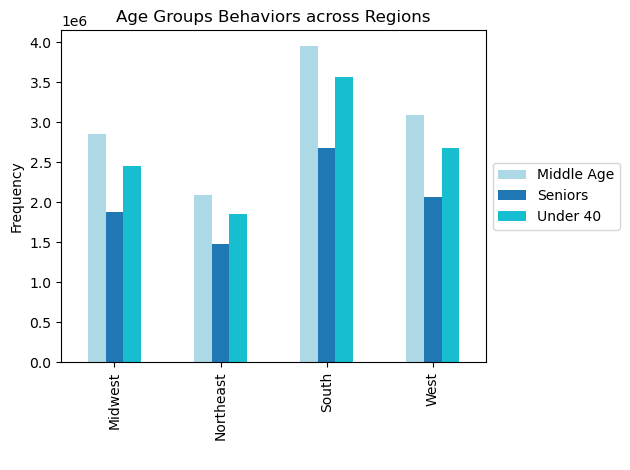

In [57]:
bar_crosstab_age_region=crosstab_age_region.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Age Groups Behaviors across Regions", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [58]:
# Export
bar_crosstab_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_region.png'))

In [59]:
crosstab_age_department=pd.crosstab(instacart_all['department'],instacart_all['age_group'],dropna=False)

In [60]:
crosstab_age_department

age_group,Middle Age,Seniors,Under 40
department,,,
alcohol,56930,36799,52806
babies,159344,103235,137799
bakery,434369,292176,381995
beverages,1001012,675315,863832
breakfast,259888,173632,229730
bulk,12524,8727,11361
canned goods,394486,266240,348934
dairy eggs,1990211,1346748,1764226
deli,389383,262202,341979


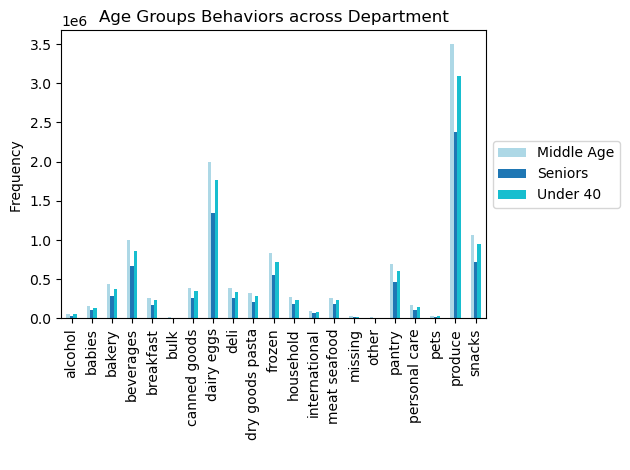

In [61]:
bar_crosstab_age_department=crosstab_age_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.ylabel("Frequency ", fontsize=10)
plt.xlabel(" ",fontsize=10)
plt.title("Age Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

#### produce department is popular among all age groups. 
#### frequency varies on department. 

In [62]:
# Export 
bar_crosstab_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_department.png'))

In [67]:
crosstab_family_status_region=pd.crosstab(instacart_all['region'],instacart_all['family_status_flag'],dropna=False)

In [66]:
crosstab_family_status_region

C:\Users\rendo\AppData\Local\Temp\ipykernel_7672\3045272129.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 690x2203756 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

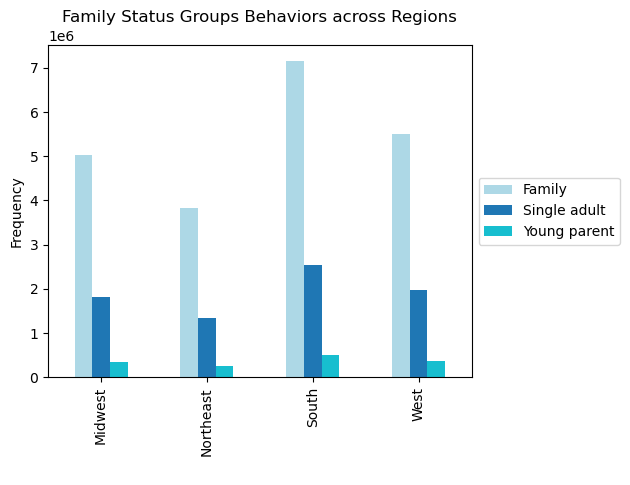

In [68]:
bar_crosstab_family_status_region=crosstab_family_status_region.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Family Status Groups Behaviors across Regions", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

#### regions are consistent with frequency

In [69]:
bar_crosstab_family_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_region.png'))

In [70]:
crosstab_family_status_department=pd.crosstab(instacart_all['department'],instacart_all['family_status_flag'],dropna=False)

In [71]:
crosstab_family_status_department

family_status_flag,Family,Single adult,Young parent
department,,,
alcohol,100448,37363,8724
babies,280706,100712,18960
bakery,776565,278656,53319
beverages,1783224,637693,119242
breakfast,465247,165227,32776
bulk,23244,7807,1561
canned goods,710766,250362,48532
dairy eggs,3581005,1273384,246796
deli,695855,250125,47584


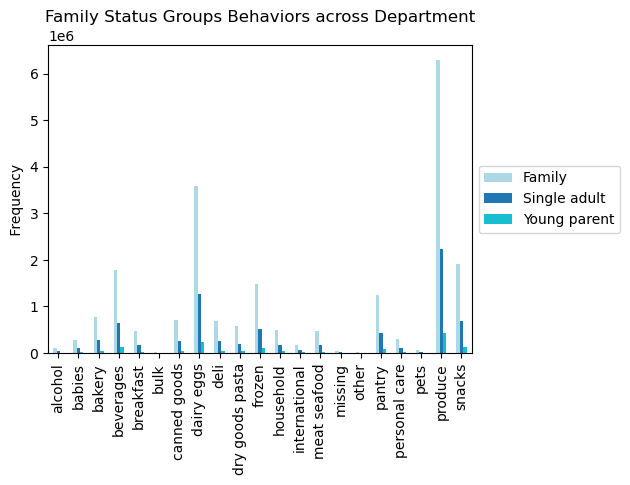

In [72]:
bar_crosstab_family_status_department=crosstab_family_status_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Family Status Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [73]:
bar_crosstab_family_status_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_department.png'))

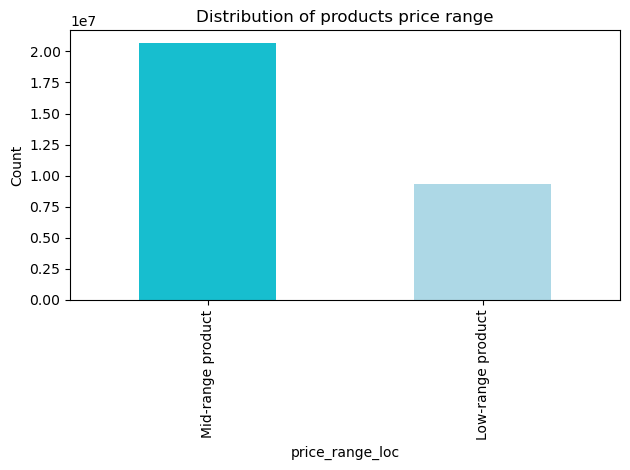

In [80]:
bar_price_range_distribution = instacart_all['price_range_loc'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of products price range",fontsize=12)
plt.tight_layout()

In [81]:
bar_price_range_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

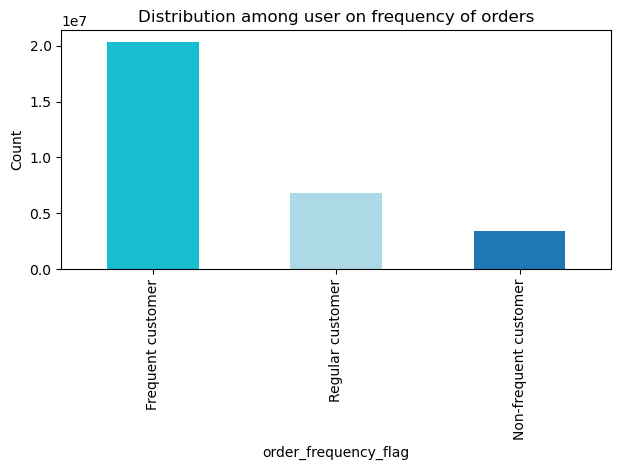

In [83]:
bar_frequency_flag = instacart_all['order_frequency_flag'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution among user on frequency of orders",fontsize=12)
plt.tight_layout()

In [84]:
instacart_all['order_frequency_flag'].value_counts(dropna=False)

order_frequency_flag
Frequent customer        20362706
Regular customer          6824080
Non-frequent customer     3442950
NaN                             5
Name: count, dtype: int64

### orders mostly come from frequent customers

In [85]:
bar_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_flag.png'))

In [86]:
crosstab_family_status_age_group=pd.crosstab(instacart_all['age_group'],instacart_all['family_status_flag'],dropna=False)

In [87]:
crosstab_family_status_age_group

family_status_flag,Family,Single adult,Young parent
age_group,,,
Middle Age,8960582,3025928,0
Seniors,6089427,2008144,0
Under 40,6459202,2615626,1470832


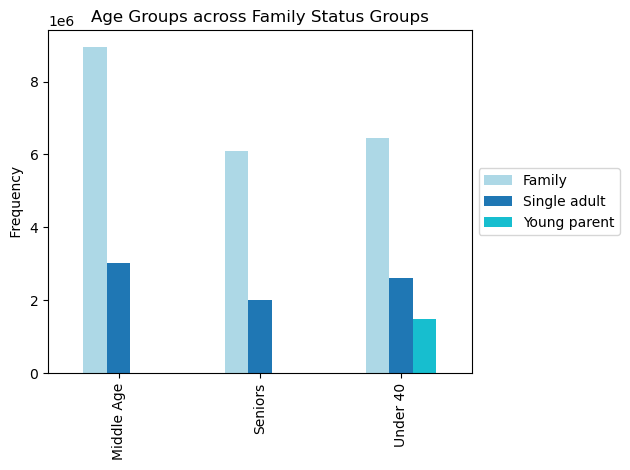

In [88]:
bar_crosstab_family_status_age_group=crosstab_family_status_age_group.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Age Groups across Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [89]:
# Export
bar_crosstab_family_status_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_age_group.png'))